In [1450]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('Dataset/heart.csv')

In [1451]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


- age: age in years
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = 
false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to - rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: have disease or not (1=yes, 0=no)

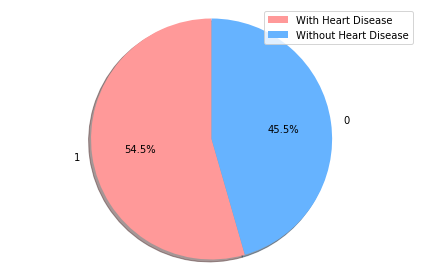

In [1452]:
colors = ['#ff9999','#66b3ff']
labels = df.target.value_counts().index
sizes = df.target.value_counts().values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
plt.legend(['With Heart Disease', "Without Heart Disease"])
plt.tight_layout()
plt.show()

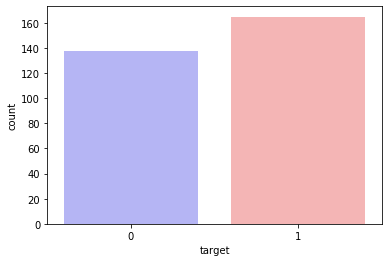

In [1453]:
sns.countplot(x="target", data=df, palette="bwr")



We have 165 person with heart disease and 138 person without heart disease, so our problem is balanced.

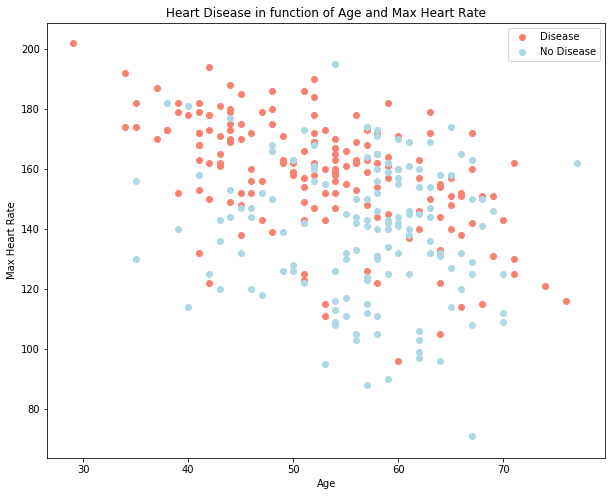

In [1454]:
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

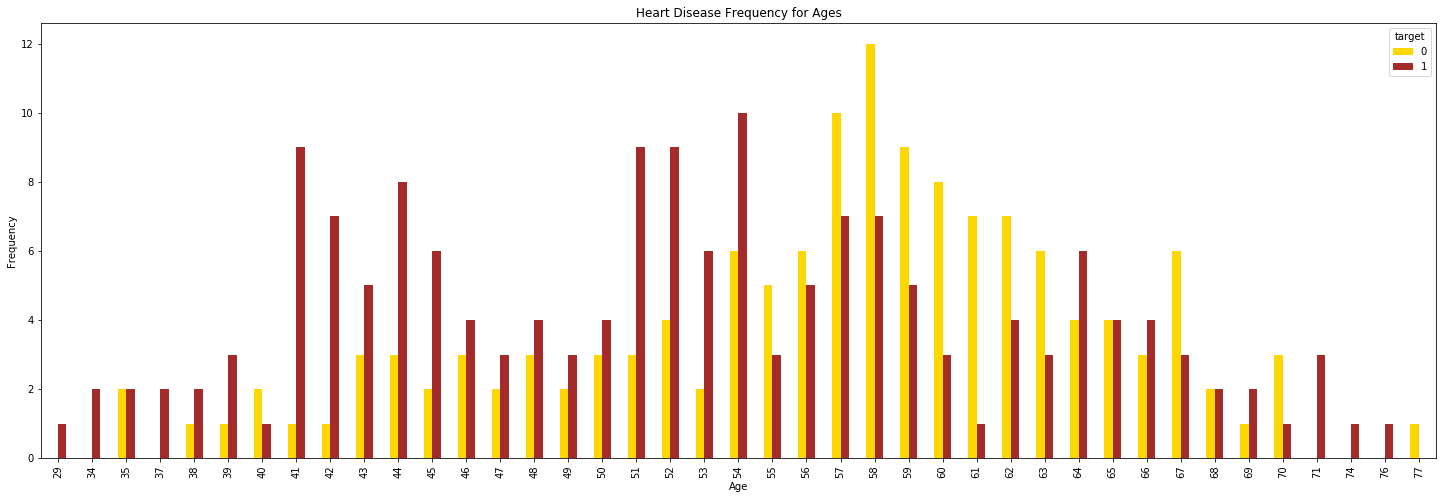

In [1455]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(25,8),color=['gold','brown' ])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [1456]:
# import seaborn as sns
# corr = df.corr()
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# f, ax = plt.subplots(figsize=(11, 9))

# sns.heatmap(corr, 
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values,mask=mask,cmap='summer_r',vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})


(14.0, 0.0)

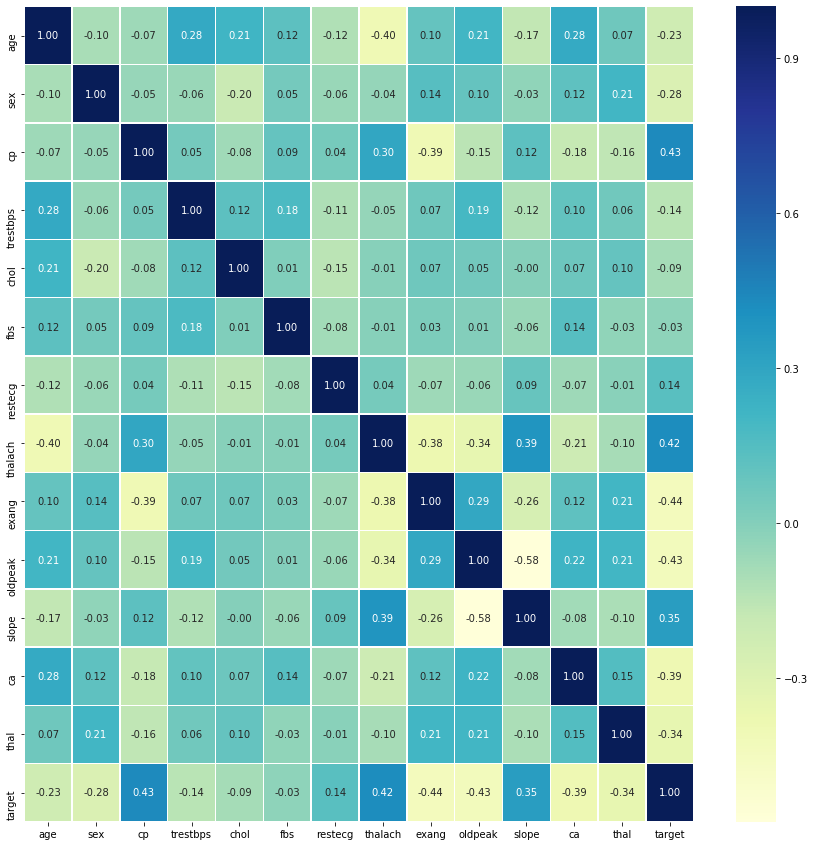

In [1457]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Creating Dummy Variables


Since 'cp', 'thal' and 'slope' are categorical variables, convert them to binary using pandas get dummy.

In [1458]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
dummies = [df, a, b, c]
df = pd.concat(dummies, axis = 1)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [1459]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [1460]:
y = df.target.values
X = df.drop(['target'], axis = 1)


### Split the Data into Train and Test set

In [1461]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [1462]:
accuracies = {'Model': [], 'Accuracy Score': []}
acc_score = {}

### Logistic regression



In [1463]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)*100))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)*100))


Training set score: 86.364
Test set score: 85.246


In [ ]:
accuracies['Model'].append('Logistic Regression')
accuracies['Accuracy Score'].append(int(logreg.score(X_test, y_test) * 100))

acc_score['Logistic Regression'] = logreg.score(X_test, y_test) * 100


### Decision Tree



In [1464]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)*100))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)*100))



Accuracy on training set: 100.000
Accuracy on test set: 78.689


The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

We set max_depth=3, limiting the depth of the tree decreases overfitting.

In [1465]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, y_train)*100))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, y_test)*100))


Accuracy on training set: 85.537
Accuracy on test set: 85.246


In [ ]:
accuracies['Model'].append('Decision Tree Classifier')
accuracies['Accuracy Score'].append(int(tree1.score(X_test, y_test) * 100))

acc_score['Decision Tree Classifier'] = tree1.score(X_test, y_test) * 100


### Random Forest

In [1466]:
#Random forest with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)*100))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)*100))

Accuracy on training set: 100.000
Accuracy on test set: 86.885


Random forest gives better accuracy with respect to Test accuracy when compared to Decision trees. 

In [1467]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)*100))



Accuracy on test set: 90.164


In [ ]:
accuracies['Model'].append('Random Forest Classifier')
accuracies['Accuracy Score'].append(int(rf1.score(X_test, y_test) * 100))
    
acc_score['Random Forest Classifier'] = rf1.score(X_test, y_test) * 100
    

### Support Vector Machine

In [1468]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)*100))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)*100))


Accuracy on training set: 100.00
Accuracy on test set: 57.38


The accuracy on the training set is 100%, while the test set accuracy is only 57%. 

SVM requires all the features to vary on a similar scale. We will need to re-scale our data that all the features are approximately on the same scale.



In [1469]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

svc1 = SVC(gamma='auto')
svc1.fit(X_train_scaled, y_train)

print("****Results after scaling****")
print('==================================')
print("Accuracy on training set: {:.2f}".format(svc1.score(X_train_scaled, y_train)*100))
print("Accuracy on test set: {:.2f}".format(svc1.score(X_test_scaled, y_test)*100))


****Results after scaling****
Accuracy on training set: 90.91
Accuracy on test set: 86.89


In [ ]:
accuracies['Model'].append('Support Vector Machine')
accuracies['Accuracy Score'].append(int(svc1.score(X_test_scaled, y_test)*100))

acc_score['Support Vector Machine'] = svc1.score(X_test_scaled, y_test)*100

### K-Nearest Neighbors Classifier

In [1470]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(knn.score(X_train, y_train)*100))
print("Accuracy on test set: {:.2f}".format(knn.score(X_test, y_test)*100))



Accuracy on training set: 79.34
Accuracy on test set: 60.66


To help normalize the data within a particular range and speed up the calculations in the algorithm, we will need to scale the data.

In [1471]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_scaled_ = mms.fit_transform(X_train)
X_test_scaled_ = mms.transform(X_test)

knn1 = KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train_scaled_, y_train)

print("****Results after scaling****")
print('==================================')
print("Accuracy on test set: {:.2f}".format(knn1.score(X_test_scaled_, y_test)*100))



****Results after scaling****
Accuracy on test set: 88.52


In [ ]:
accuracies['Model'].append('K-Nearest Neighbor Classifier')
accuracies['Accuracy Score'].append(int(knn1.score(X_test_scaled_, y_test)*100))

acc_score['K-Nearest Neighbour Classifier'] = knn1.score(X_test_scaled_, y_test)*100

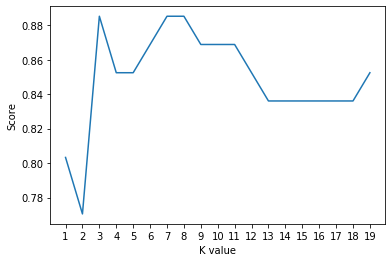

Maximum KNN Score is 88.52%


In [1472]:
scoreList = []
for i in range(1,20):
    mms1 = MinMaxScaler()
    X_train_scaled_ = mms1.fit_transform(X_train)

    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train_scaled_, y_train)

    scoreList.append(knn2.score(X_test_scaled_, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()


maximum = max(scoreList)*100
print("Maximum KNN Score is {:.2f}%".format(maximum))


In [1473]:
# from sklearn.ensemble import GradientBoostingClassifier

# gb = GradientBoostingClassifier(max_depth=1,random_state=0)
# gb.fit(X_train, y_train)
# print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)*100))
# print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)*100))

# accuracies['Gradient Boosting'] = gb.score(X_test, y_test) * 100






In [1475]:
# Predicted values
y_lr = logreg.predict(X_test)
y_gb = gb.predict(X_test)
y_knn = knn1.predict(X_test)
y_svm = svc1.predict(X_test)
y_tree = tree.predict(X_test)
y_rf = rf.predict(X_test)


In [1476]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_lr)
cm_knn = confusion_matrix(y_test,y_knn)
cm_svm = confusion_matrix(y_test,y_svm)
cm_tree = confusion_matrix(y_test,y_tree)
cm_rf = confusion_matrix(y_test,y_rf)


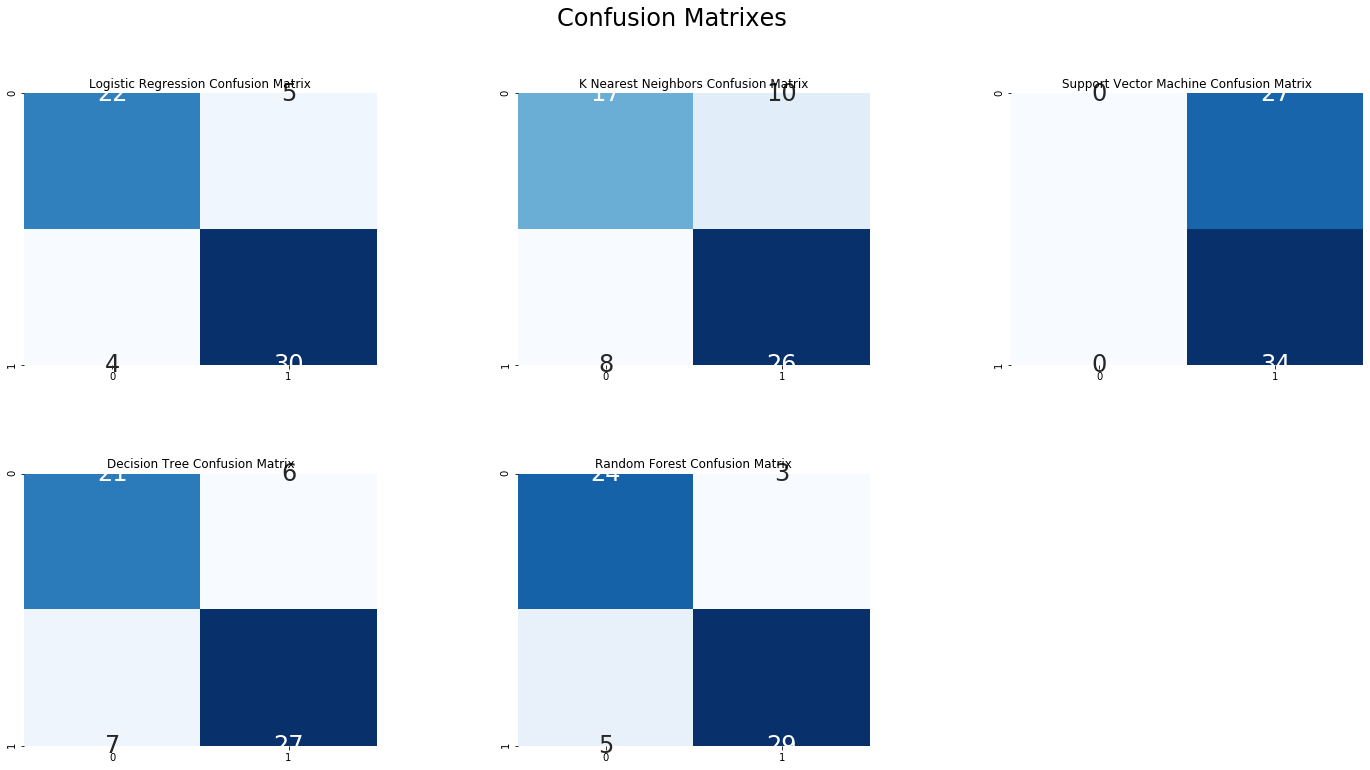

In [1477]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(cm_tree,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

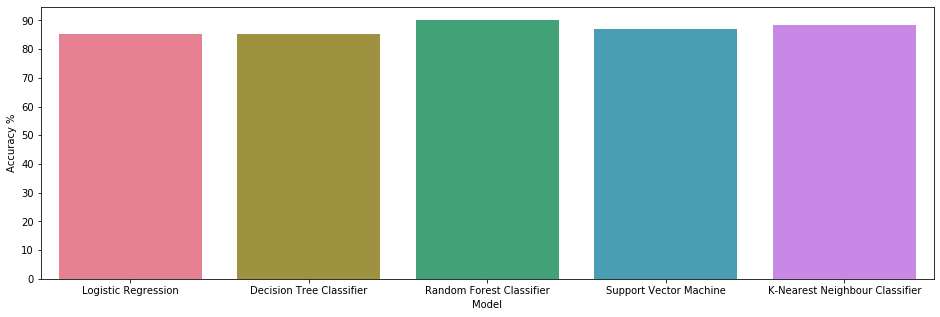

In [1474]:
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Model")
sns.barplot(x=list(acc_score.keys()), y=list(acc_score.values()), palette="husl")
plt.show()

In [1478]:
dt = pd.DataFrame(accuracies)
dt

,Model,Accuracy Score
0,Logistic Regression,85
1,Decision Tree Classifier,85
2,Random Forest Classifier,90
3,Support Vector Machine,86
4,K-Nearest Neighbor Classifier,88


Our best models are Random Forest with 90% of accuracy and KNN with 88%.